In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir="../resources/",untar=True)

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('../resources/datasets/flower_photos')

In [8]:
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

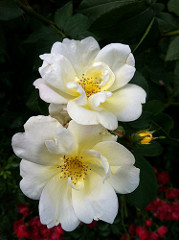

In [9]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

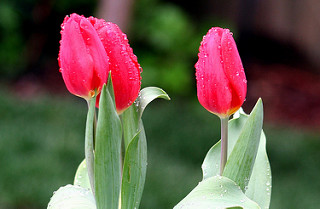

In [13]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [58]:
flower_images_dict=dict()
for i in data_dir.iterdir():
    if i.is_dir():
        flower_images_dict[i.name]=flower_images_dict.get(i.name,list(i.glob("*")))

class_names=list(flower_images_dict.keys())

In [59]:
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

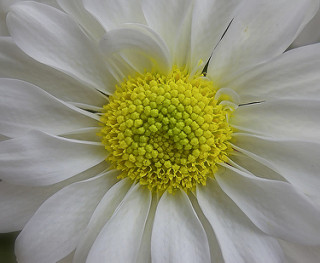

In [60]:
PIL.Image.open(str(flower_images_dict[class_names[0]][0]))   

In [66]:
img=cv2.imread(str(flower_images_dict[class_names[2]][0]))
img.shape

(240, 179, 3)

In [67]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [71]:
X,y=[],[]

for flower_name,images in flower_images_dict.items():
    i=classes.index(flower_name)
    for image in images:
        img=cv2.imread(str(image))
        reshaped_img=cv2.resize(img,(100,100))
        X.append(reshaped_img)
        y.append(i)
        
X=np.array(X)
y=np.array(y)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,stratify=y)

In [82]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [107]:
X_train_scaled.shape,X_test_scaled.shape

((2752, 100, 100, 3), (918, 100, 100, 3))

In [103]:
cnn=keras.Sequential([
    #cnn
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=X_train_scaled[0].shape),
    layers.MaxPooling2D(),
    
    layers.Conv2D(8,3,activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(len(class_names))
])
cnn.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
cnn.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
86/86 [==============================] - 28s 293ms/step - loss: 1.3193 - accuracy: 0.4281 - val_loss: 132.3862 - val_accuracy: 0.4749
Epoch 2/10
86/86 [==============================] - 19s 216ms/step - loss: 1.0875 - accuracy: 0.5527 - val_loss: 126.4446 - val_accuracy: 0.4956
Epoch 3/10
86/86 [==============================] - 18s 215ms/step - loss: 0.9387 - accuracy: 0.6239 - val_loss: 154.3893 - val_accuracy: 0.5294
Epoch 4/10
86/86 [==============================] - 18s 213ms/step - loss: 0.8182 - accuracy: 0.6915 - val_loss: 207.1477 - val_accuracy: 0.5240
Epoch 5/10
86/86 [==============================] - 18s 215ms/step - loss: 0.6896 - accuracy: 0.7395 - val_loss: 190.7885 - val_accuracy: 0.5479
Epoch 6/10
86/86 [==============================] - 21s 241ms/step - loss: 0.5352 - accuracy: 0.8103 - val_loss: 213.3262 - val_accuracy: 0.5218
Epoch 7/10
86/86 [==============================] - 19s 225ms/step - loss: 0.4237 - accuracy: 0.8608 - val_loss: 299.5139 - val_ac

In [111]:
cnn.evaluate(X_train_scaled,y_train)

86/86 [==============================] - 7s 80ms/step - loss: 0.1794 - accuracy: 0.9520


[0.1794130802154541, 0.9520348906517029]

In [110]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 65ms/step - loss: 1.6347 - accuracy: 0.5272


[1.6347134113311768, 0.5272331237792969]

In [116]:
predictions=cnn.predict(X_test_scaled)
predictions[:5]

29/29 [==============================] - 2s 66ms/step


array([[-6.7196167e-01,  2.7715907e-01,  3.1234441e+00, -2.7342112e+00,
         3.6988649e+00],
       [-5.2426291e+00,  1.4108782e+00,  7.3661761e+00, -3.6315670e+00,
         4.8229165e+00],
       [ 2.2797908e-01,  2.9447112e+00,  3.8568885e-03, -2.9171822e+00,
        -7.9292661e-01],
       [-1.8790253e+00, -3.7133119e+00,  3.5932484e+00, -4.4244379e-03,
         6.8544970e+00],
       [-2.8071515e-02,  7.7757807e+00, -3.9744239e+00, -2.4398427e+00,
        -1.8433247e+00]], dtype=float32)

In [117]:
predictions=tf.nn.softmax(predictions)
predictions[:5]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[7.8544784e-03, 2.0291552e-02, 3.4949514e-01, 9.9883531e-04,
        6.2135994e-01],
       [3.0913693e-06, 2.3973540e-03, 9.2487961e-01, 1.5481957e-05,
        7.2704546e-02],
       [5.7692286e-02, 8.7293011e-01, 4.6108678e-02, 2.4842278e-03,
        2.0784711e-02],
       [1.5496108e-04, 2.4751529e-05, 3.6880851e-02, 1.0100700e-03,
        9.6192938e-01],
       [4.0794795e-04, 9.9948126e-01, 7.8836238e-06, 3.6575108e-05,
        6.6412576e-05]], dtype=float32)>

In [119]:
y_predicted=[]
for pred in predictions:
    y_predicted.append(np.argmax(pred))

y_predicted[:5]

[4, 2, 1, 4, 1]

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       158
           1       0.54      0.69      0.61       225
           2       0.41      0.51      0.46       160
           3       0.82      0.43      0.56       175
           4       0.57      0.45      0.50       200

    accuracy                           0.53       918
   macro avg       0.56      0.52      0.52       918
weighted avg       0.56      0.53      0.53       918



In [124]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=X_train[0].shape),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2789, in while_loop
    return result  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2745, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\map_fn.py", line 493, in compute
    return (i + 1, tas)  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\map_fn.py", line 491, in <listcomp>
    ta.write(i, value) for (ta, value) in zip(tas, result_value_batchable)  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2789, in while_loop
    return result  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2745, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\map_fn.py", line 493, in compute
    return (i + 1, tas)  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\map_fn.py", line 491, in <listcomp>
    ta.write(i, value) for (ta, value) in zip(tas, result_value_batchable)  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning

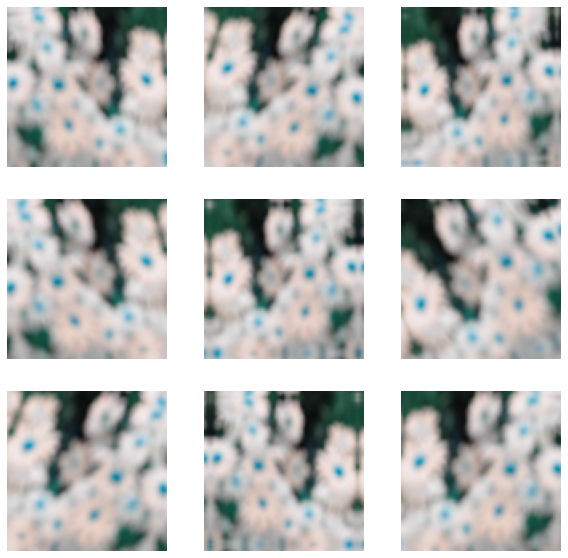

In [148]:
y=X_train[0].reshape(1,100,100,3)
plt.figure(figsize=(10, 10))
for i in range(9): 
    augmented_image = data_augmentation(y)[0]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis("off")

In [150]:
cnn2=keras.Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=X_train_scaled[0].shape),
    layers.MaxPooling2D(),
    
    layers.Conv2D(8,3,activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(len(class_names))
])
cnn2.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history2=cnn2.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
86/86 [==============================] - 41s 301ms/step - loss: 1.4700 - accuracy: 0.3223 - val_loss: 152.0228 - val_accuracy: 0.3126
Epoch 2/10
86/86 [==============================] - 23s 272ms/step - loss: 1.1909 - accuracy: 0.5080 - val_loss: 199.9182 - val_accuracy: 0.4259
Epoch 3/10
86/86 [==============================] - 24s 274ms/step - loss: 1.0684 - accuracy: 0.5683 - val_loss: 177.3112 - val_accuracy: 0.4880
Epoch 4/10
86/86 [==============================] - 26s 299ms/step - loss: 1.0119 - accuracy: 0.5923 - val_loss: 235.5090 - val_accuracy: 0.4673
Epoch 5/10
86/86 [==============================] - 25s 290ms/step - loss: 0.9848 - accuracy: 0.6119 - val_loss: 330.5659 - val_accuracy: 0.4303
Epoch 6/10
86/86 [==============================] - 23s 266ms/step - loss: 0.9445 - accuracy: 0.6301 - val_loss: 309.1680 - val_accuracy: 0.4706
Epoch 7/10
86/86 [==============================] - 24s 280ms/step - loss: 0.9226 - accuracy: 0.6399 - val_loss: 242.0229 - val_ac

In [151]:
cnn2.evaluate(X_train_scaled,y_train)

86/86 [==============================] - 7s 72ms/step - loss: 0.7870 - accuracy: 0.7060


[0.7870023250579834, 0.7060319781303406]

In [152]:
cnn2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 67ms/step - loss: 0.9341 - accuracy: 0.6394


[0.9340950846672058, 0.6394335627555847]

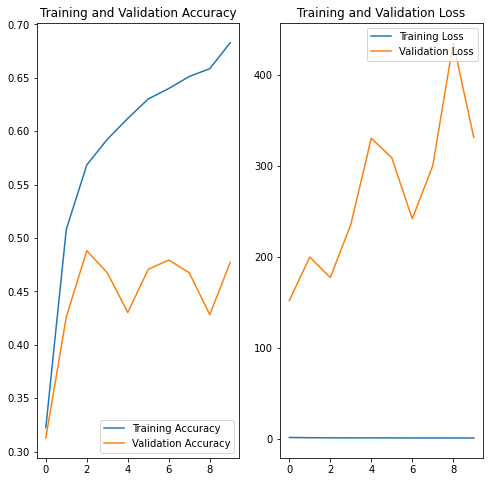

In [153]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()